In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linprog


def nash_equilibrium(A):
    
    transform = False
    mat_min = A.min()
    if mat_min <= 0:
        transform = True
        A += abs(mat_min) + 1
    m_raws, n_columns = A.shape
    
    #setting first player game parameters
    A1 = -np.transpose(A)
    bound1 = -np.ones(n_columns)
    c1 = np.ones(m_raws)
    
    #second player
    #A2 = A
    bound2 = np.ones(m_raws)
    c2 = -np.ones(n_columns)
    
    #solving tasks for both players
    res1 = linprog(c1, A_ub=A1, b_ub=bound1)
    opt_strat1 = res1.x
    
    res2 = linprog(c2, A_ub=A, b_ub=bound2)
    opt_strat2 = res2.x
    
    #getting optimal strategies and game value
    game_value = 1/(np.sum(opt_strat1))
    opt_strat1 *= game_value
    opt_strat2 *= game_value
    if(transform):
        A += mat_min - 1
        game_value += mat_min - 1

    #printing the results
    print("Matrix")
    print(A)
    print("Game value is", format(game_value,'.2f'), '\n')
    print("1 player optimal strategy is", opt_strat1)
    print("2 player optimal strategy is", opt_strat2)

    return game_value, opt_strat1, opt_strat2

def visualize(opt_strat1, opt_strat2):

    #first player

    #setting necessary parameters
    data_names = range(1, len(opt_strat1)+1)
    data_values = opt_strat1
    xs = range(len(data_names))

    #setting diagram scale
    dpi=85
    plt.figure(dpi=dpi)

    #setting text scale
    mpl.rcParams.update({'font.size': 12})

    #headline
    plt.title('1 player')
    plt.xlabel('Possible strategies')
    plt.ylabel('Probability of using a strategy')

    #adding lines parellel to X-axis 
    ax = plt.axes()
    ax.yaxis.grid(True, zorder = 1)

    #drawing bars
    plt.bar([x-1 for x in data_names], data_values,
            width = 0.7, color = 'blue', alpha = 0.7,
            zorder = 2)
    plt.xticks(xs, data_names)

    plt.show()
    

    #second player
    
    data_names = range(1, len(opt_strat2)+1)
    data_values = opt_strat2
    xs = range(len(data_names))
    
    dpi=85
    plt.figure(dpi=dpi)
    
    mpl.rcParams.update({'font.size': 12})
    
    plt.title('2 player')
    plt.xlabel('Possible strategies')
    plt.ylabel('Probabilities')
    
    ax = plt.axes()
    ax.yaxis.grid(True, zorder = 1)
    
    plt.bar([x-1 for x in data_names], data_values,
            width = 0.7, color = 'red', alpha = 0.7,
            zorder = 2)
    plt.xticks(xs, data_names)

    plt.show()
    

# Примеры
---------

# 1. Спектр оптимальной стратегии состоит из одной точки

Matrix
[[-4  1  5 -2  8]
 [ 2 -4  2 -1 -3]
 [10  4  4  5  6]]
Game value is 4.00 

1 player optimal strategy is [ 0.  0.  1.]
2 player optimal strategy is [ 0.  1.  0.  0.  0.]


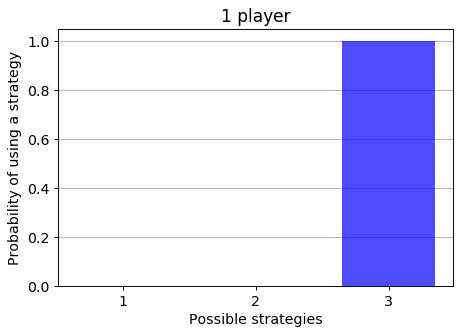

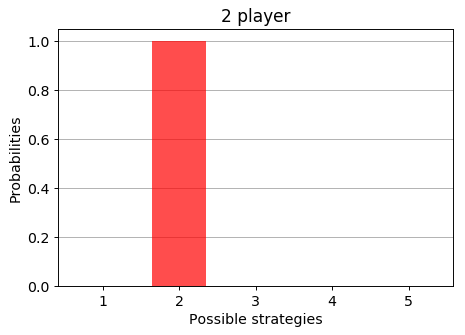

In [2]:
A = np.array([[-4,1,5,-2,8],[2,-4,2,-1,-3],[10,4,4,5,6]])
res = nash_equilibrium(A)
visualize(res[1], res[2])

# 2. Спектр оптимальной стратегии неполон

Matrix
[[ 3 -1  5  4  6]
 [-1  8  7  3  3]
 [ 2  3  1  3 -1]
 [ 6  3 -3  1  0]]
Game value is 2.79 

1 player optimal strategy is [ 0.40740741  0.28395062  0.          0.30864198]
2 player optimal strategy is [ 0.28395062  0.18518519  0.          0.5308642   0.        ]


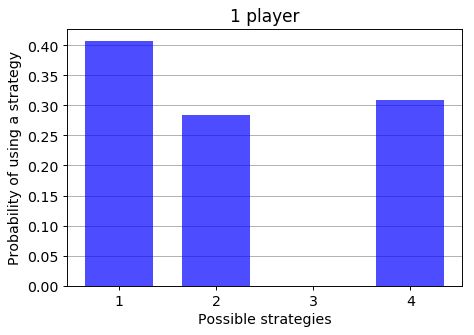

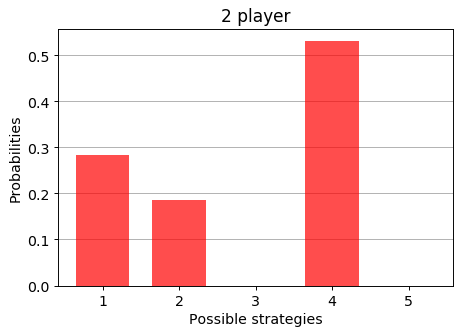

In [3]:
A = np.array([[3,-1,5,4,6],[-1,8,7,3,3],[2,3,1,3,-1],[6,3,-3,1,0]])
res = nash_equilibrium(A)
visualize(res[1], res[2])

# 3. Спектр оптимальной стратегии полон

Matrix
[[ 3 -4  2  5]
 [ 3  7  3  3]
 [ 1  6  5  2]
 [ 6  3  6  0]]
Game value is 3.19 

1 player optimal strategy is [ 0.29906542  0.51401869  0.07476636  0.11214953]
2 player optimal strategy is [ 0.13084112  0.04672897  0.37694704  0.44548287]


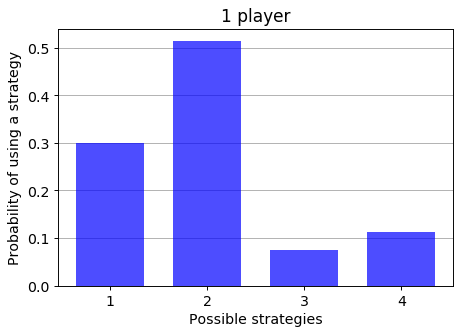

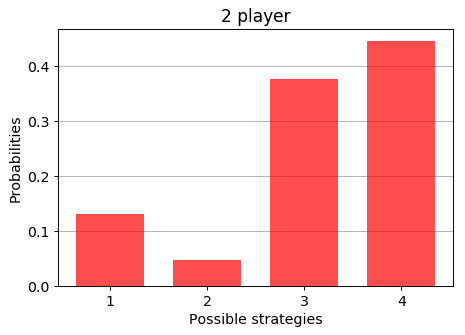

In [4]:
A = np.array([[3,-4,2,5],[3,7,3,3],[1,6,5,2],[6,3,6,0]])
res = nash_equilibrium(A)
visualize(res[1], res[2])